In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.utils import np_utils
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

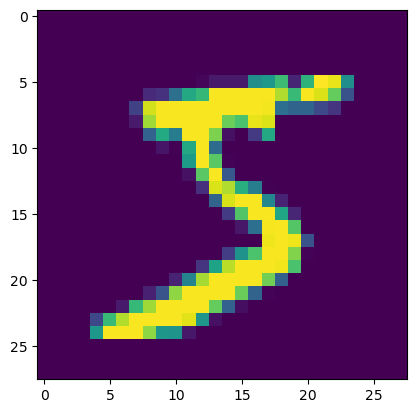

5


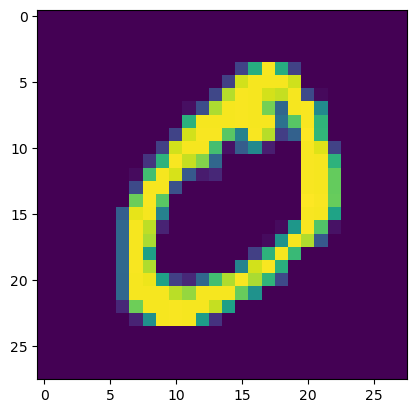

0


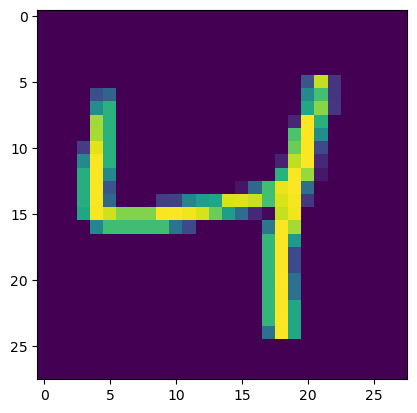

4


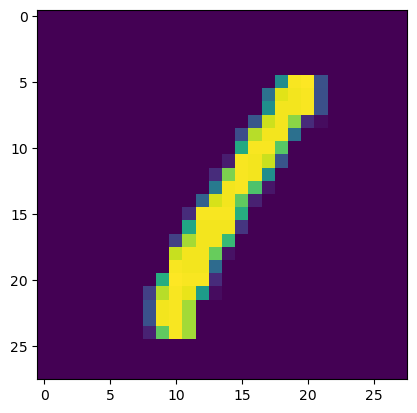

1


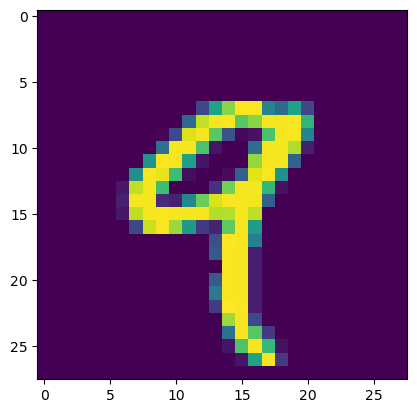

9


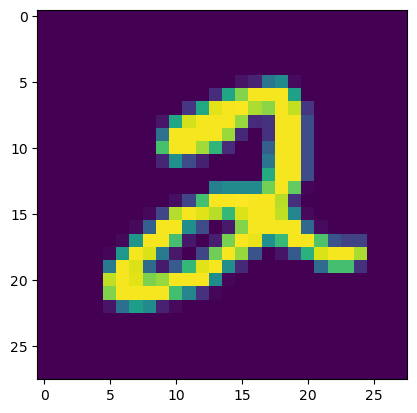

2


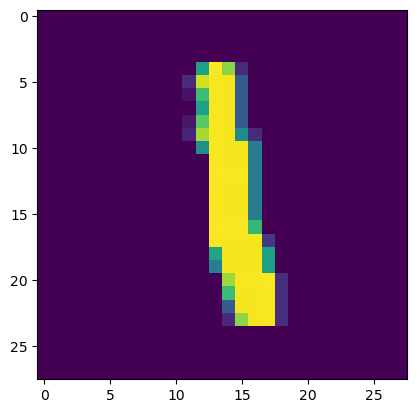

1


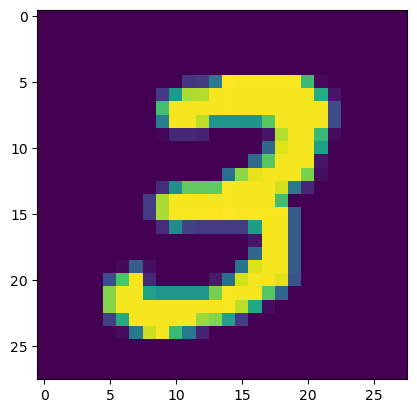

3


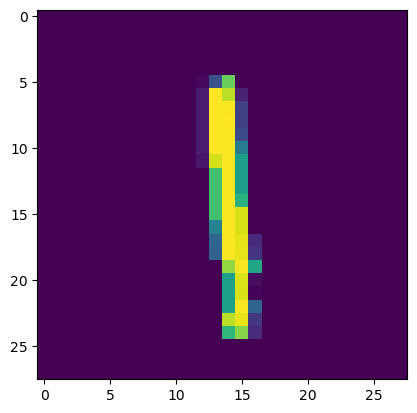

1


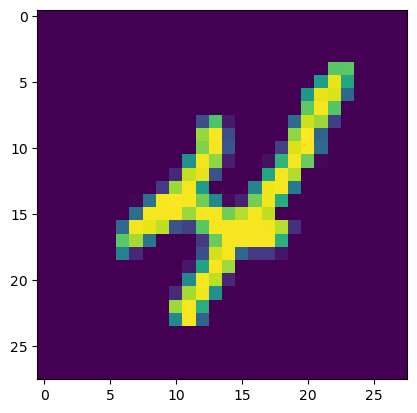

4


In [5]:
for i in range(10):
  plt.imshow(X_train[i])
  plt.show()
  print(y_train[i])


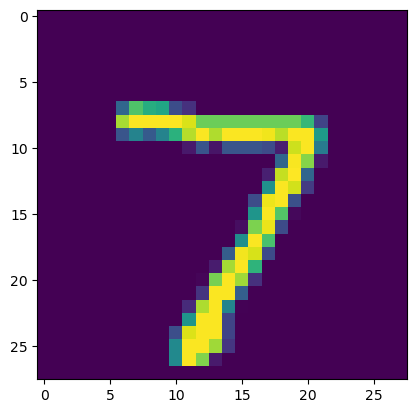

7


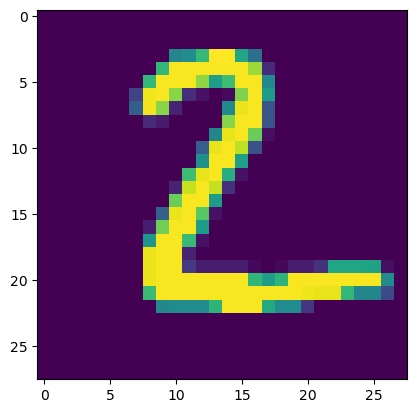

2


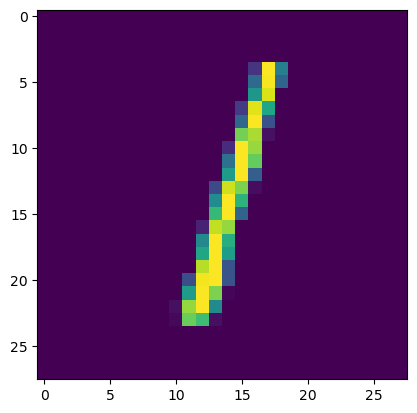

1


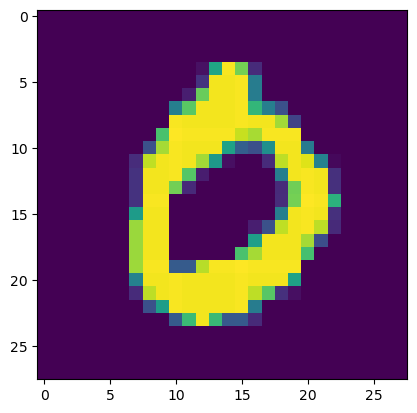

0


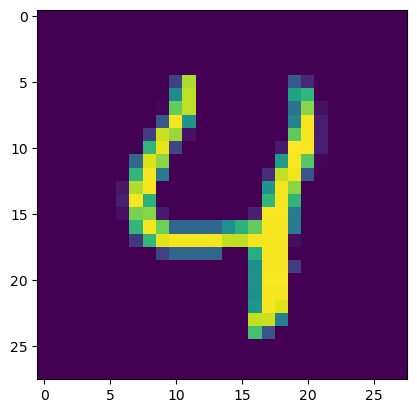

4


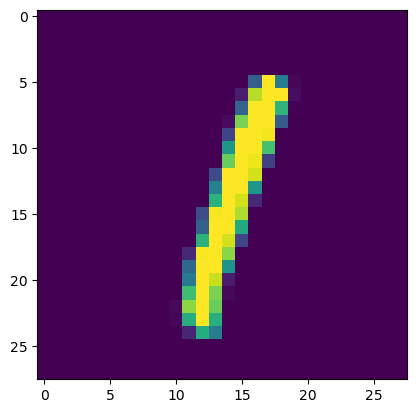

1


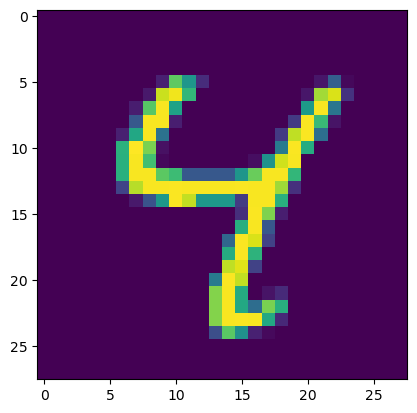

4


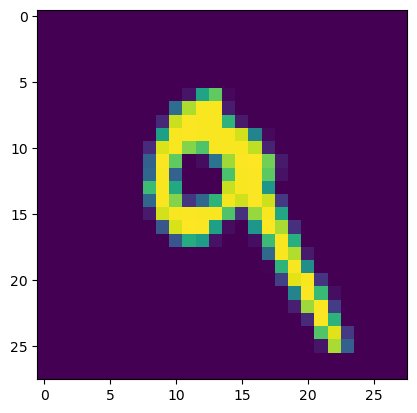

9


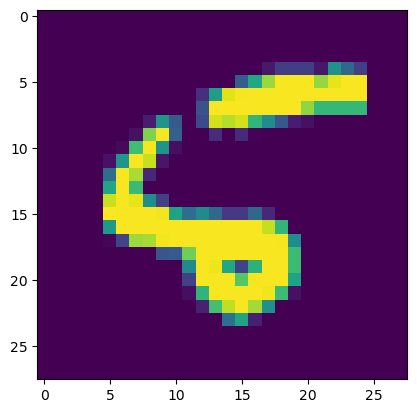

5


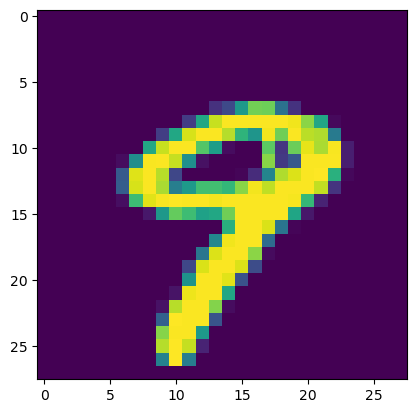

9


In [6]:
for i in range(10):
  plt.imshow(X_test[i])
  plt.show()
  print(y_test[i])

In [7]:
#Flattening

In [8]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [9]:
#normalizing

In [10]:
X_train/=255
X_test/=255

In [11]:
X_train[0:10,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#Target Class
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
#one hot encoding

In [14]:
n_classes=10

In [15]:
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)

In [16]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [17]:
#model building

In [18]:
model=Sequential()

In [19]:
model.add(Dense(100,input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
es=EarlyStopping(monitor='loss',patience=3)

In [22]:
h_callback=model.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=[X_test,y_test],callbacks=es)

Epoch 1/50
469/469 [==============================] - 4s 6ms/step - loss: 0.3706 - accuracy: 0.9004 - val_loss: 0.2046 - val_accuracy: 0.9414
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1738 - accuracy: 0.9506 - val_loss: 0.1452 - val_accuracy: 0.9589
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1282 - accuracy: 0.9633 - val_loss: 0.1245 - val_accuracy: 0.9637
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1022 - accuracy: 0.9703 - val_loss: 0.1067 - val_accuracy: 0.9691
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0845 - accuracy: 0.9756 - val_loss: 0.1033 - val_accuracy: 0.9686
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0719 - accuracy: 0.9790 - val_loss: 0.0970 - val_accuracy: 0.9699
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0605 - accuracy: 0.9825 - val_loss: 0.0880 - val_accuracy: 0.9740
Epoch 

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1014 - accuracy: 0.9784


[0.10138129442930222, 0.9783999919891357]

In [24]:
#Using Convolution Layer

In [25]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [26]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [27]:
#normalizing

In [28]:
X_train/=255
X_test/=255

In [29]:
n_classes=10

In [30]:
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)

In [31]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [32]:
#model building

In [33]:
model=Sequential()

In [34]:
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [35]:
#flatten

In [36]:
model.add(Flatten())

In [37]:
#hidden layer

In [38]:
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [39]:
#compiling

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [41]:
#model fitting

In [42]:
es=EarlyStopping(monitor='loss',patience=3)

In [43]:
h_callback1=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=[X_test,y_test],callbacks=es)

Epoch 1/10
469/469 [==============================] - 115s 241ms/step - loss: 0.1704 - accuracy: 0.9478 - val_loss: 0.0483 - val_accuracy: 0.9844
Epoch 2/10
469/469 [==============================] - 118s 251ms/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.0402 - val_accuracy: 0.9861
Epoch 3/10
469/469 [==============================] - 117s 249ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 4/10
469/469 [==============================] - 109s 232ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 108s 231ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0356 - val_accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 106s 225ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0550 - val_accuracy: 0.9853
Epoch 7/10
469/469 [==============================] - 108s 231ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0397 -

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0432 - accuracy: 0.9893


[0.04319208115339279, 0.989300012588501]

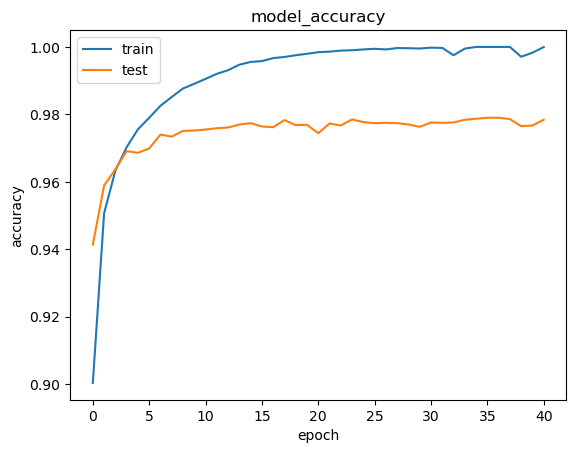

In [74]:
plt.plot(h_callback.history['accuracy'])
plt.plot(h_callback.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

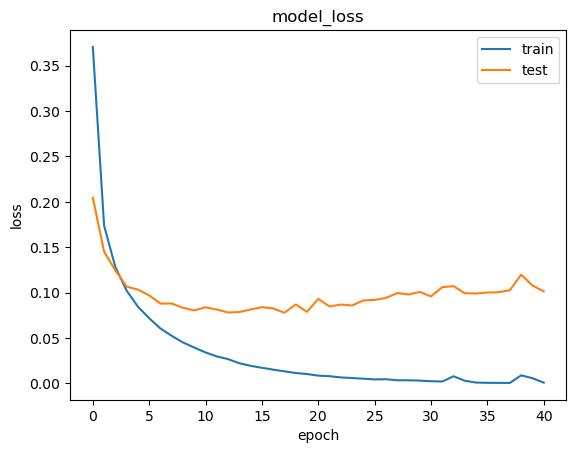

In [75]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [53]:
y_pred_test=model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [54]:
y_pred_train=model.predict(X_train)

1875/1875 [==============================] - 26s 14ms/step


In [55]:
y_prediction_test=np.argmax(np.round(y_pred_test,3),axis=1)
y_prediction_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [56]:
y_prediction_train=np.argmax(np.round(y_pred_train,3),axis=1)
y_prediction_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [64]:
Y_test = np.argmax(y_test, axis=1)
Y_train=np.argmax(y_train,axis=1)

In [72]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score

In [73]:
print('Train Accuracy:', accuracy_score(Y_train,y_prediction_train))
print('Test Accuracy:', accuracy_score(Y_test,y_prediction_test))
print('F1 score:', f1_score(Y_test,y_prediction_test,average='weighted'))
print('Recall Score:',recall_score(Y_test,y_prediction_test,average='weighted'))
print('Precision Score:',precision_score(Y_test,y_prediction_test,average='weighted'))

Train Accuracy: 0.9991333333333333
Test Accuracy: 0.9893
F1 score: 0.9892963551619991
Recall Score: 0.9893
Precision Score: 0.989318086733273
